In [9]:
#import des libraires nécessaires
import os
import numpy as np
import nibabel as nib
import pandas as pd
import seaborn as sns
import glob
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
from importlib import reload
from itertools import combinations
%matplotlib inline
from IPython.display import display,Image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
#Chemin 
STUDY_PATH=os.path.join("/NAS","dumbo","protocoles","creamhd")
BIDS_DIR=os.path.join(STUDY_PATH,"data","20241223-153940_3DT1")
DERIVATIVE_DIR1=os.path.join(BIDS_DIR,"derivatives_v2.0")


In [12]:
# Path to the Excel file
excel_file_path = os.path.join(BIDS_DIR, 'MRIDATA_CreamHD_3DT1_M00_M24_23122024.xlsx')

# Read the first sheet (M00) into a dataframe
df_mri_data_M00 = pd.read_excel(excel_file_path, sheet_name='M00')

# Read the second sheet (M24) into another dataframe
df_mri_data_M24 = pd.read_excel(excel_file_path, sheet_name='M24')

# Display the dataframes
display(df_mri_data_M00)
display(df_mri_data_M24)

,Code patient,Centre,Date d'IRM Dicom,commentaire,3DT1 sftp,constructeur,modèle,champ,logiciel,antenne,respect du protocole 3DT1,QC 3DT1 \n0: inexploitable 3: Bien 2: limite \n4: parfaite,décision 3DT1\n0: rejet\n1: rescan\n3: limite\n4: OK,commentaire 3DT1,3DT1 sans correction de distorsion géométrique,3DT1 avec correction de distorsion géométrique
0,01001BS,Lille,20171011,NaN,oui,Philips,Achieva,3T,"['5.1.7', '5.1.7.2']",MULTI COIL,oui,3.0,4.0,NaN,ok,NaN
1,01002DN,Lille,20180416,NaN,oui,Philips,Achieva,3T,"['5.1.7', '5.1.7.2']",MULTI COIL,oui,3.0,4.0,NaN,ok,ok
2,01003CJ,Lille,20180423,NaN,oui,Philips,Achieva,3T,"['5.1.7', '5.1.7.2']",MULTI COIL,oui,3.0,4.0,NaN,ok,ok
3,01004CH,Lille,20180604,NaN,oui,Philips,Achieva,3T,"['5.1.7', '5.1.7.2']",MULTI COIL,oui,2.0,3.0,mouvement++,ok,ok
4,01005AA,Lille,20180806,NaN,oui,Philips,Achieva,3T,"['5.1.7', '5.1.7.2']",MULTI COIL,oui,3.0,4.0,NaN,ok,ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,14004CS,Toulouse,20191209,NaN,oui,Philips,Achieva dstream,3T,"['5.6.1', '5.6.1.0']",MULTI COIL,oui,3.0,4.0,NaN,ok,ok
69,14006LS,Toulouse,20211021,NaN,oui,Philips,Achieva dstream,3T,"['5.6.1', '5.6.1.2']",MULTI COIL,oui,3.0,4.0,NaN,ok,ok
70,14007WA,Toulouse,20220314,NaN,oui,Philips,Achieva dstream,3T,"['5.6.1', '5.6.1.3']",MULTI COIL,oui,3.0,4.0,NaN,ok,ok
71,14008HL,Toulouse,20221010,NaN,oui,Philips,Achieva dstream,3T,"['5.6.1', '5.6.1.3']",MULTI COIL,oui,3.0,4.0,NaN,ok,ok


,Code patient,Centre,Date d'IRM Dicom,commentaire,3DT1 sftp,constructeur,modèle,champ,logiciel,antenne,respect du protocole 3DT1,QC 3DT1 \n0: inexploitable 3: Bien 2: limite \n4: parfaite,décision 3DT1\n0: rejet\n1: rescan\n3: limite\n4: OK,commentaire 3DT1,3DT1 sans correction de distorsion géométrique,3DT1 avec correction de distorsion géométrique
0,01001BS,Lille,20191120.0,NaN,oui,Philips,Achieva dstream,3T,"['5.3.1', '5.3.1.3']",MULTI COIL,oui,2.0,3.0,mouvement++,ok,NaN
1,01002DN,Lille,20200713.0,NaN,oui,Philips,Achieva dstream,3T,"['5.7.1', '5.7.1.0']",MULTI COIL,oui,3.0,4.0,NaN,ok,ok
2,01003CJ,Lille,NaN,pas d'IRM M24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01004CH,Lille,20200903.0,NaN,oui,Philips,Achieva dstream,3T,"['5.7.1', '5.7.1.0']",MULTI COIL,oui,3.0,4.0,NaN,ok,ok
4,01005AA,Lille,NaN,pas d'IRM M24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,14004CS,Toulouse,20211129.0,NaN,oui,Philips,Achieva dstream,3T,"['5.6.1', '5.6.1.2']",MULTI COIL,oui,3.0,4.0,NaN,ok,ok
69,14006LS,Toulouse,20231123.0,NaN,oui,Philips,Achieva dstream,3T,"['5.7.1', '5.7.1.3']",MULTI COIL,oui,3.0,4.0,NaN,ok,ok
70,14007WA,Toulouse,20240425.0,NaN,oui,Philips,Achieva dstream,3T,"['5.7.1', '5.7.1.3']",MULTI COIL,oui,3.0,4.0,NaN,ok,ok
71,14008HL,Toulouse,20241014.0,NaN,oui,Philips,Achieva dstream,3T,"['5.7.1', '5.7.1.3']",MULTI COIL,oui,3.0,4.0,NaN,ok,ok


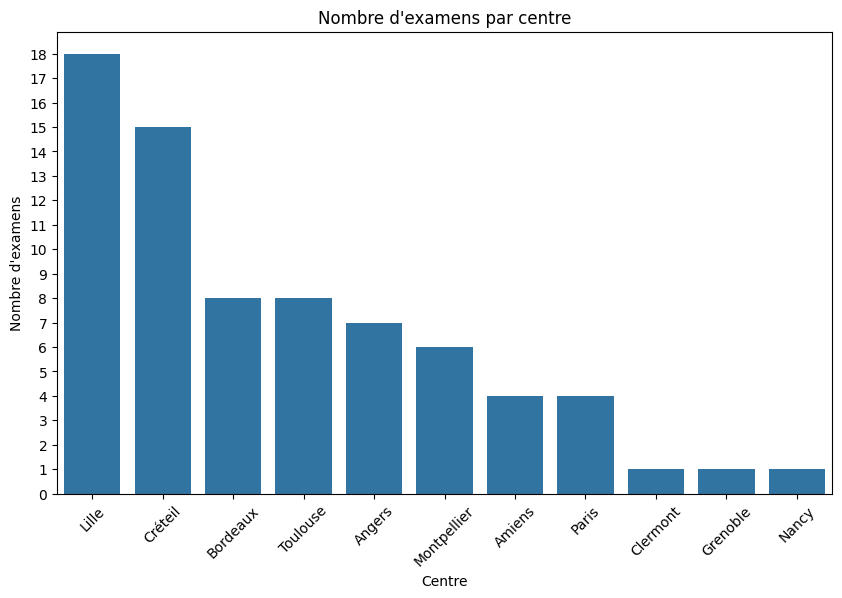

In [17]:
# Compter le nombre d'examens par centre
exam_count_by_centre = df_mri_data_M00['Centre'].value_counts().reset_index()
exam_count_by_centre.columns = ['Centre', 'Nombre d\'examens']

# Créer le graphique
plt.figure(figsize=(10, 6))
sns.barplot(x='Centre', y='Nombre d\'examens', data=exam_count_by_centre)
plt.title('Nombre d\'examens par centre')
plt.xlabel('Centre')
plt.ylabel('Nombre d\'examens')
plt.xticks(rotation=45)

# Définir les ticks de l'axe des ordonnées pour n'afficher que des valeurs entières
plt.yticks(range(0, exam_count_by_centre['Nombre d\'examens'].max() + 1))

plt.show()

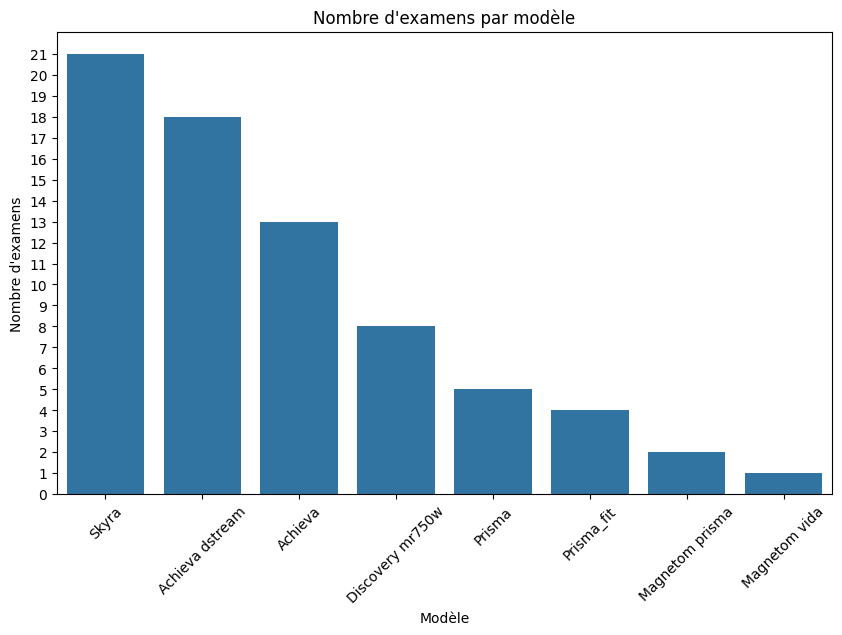

In [15]:
# Compter le nombre d'examens par modèle
exam_count_by_modele = df_mri_data_M00['modèle'].value_counts().reset_index()
exam_count_by_modele.columns = ['modèle', 'Nombre d\'examens']

# Créer le graphique
plt.figure(figsize=(10, 6))
sns.barplot(x='modèle', y='Nombre d\'examens', data=exam_count_by_modele)
plt.title('Nombre d\'examens par modèle')
plt.xlabel('Modèle')
plt.ylabel('Nombre d\'examens')
plt.xticks(rotation=45)

# Définir les ticks de l'axe des ordonnées pour n'afficher que des valeurs entières
plt.yticks(range(0, exam_count_by_modele['Nombre d\'examens'].max() + 1))

plt.show()

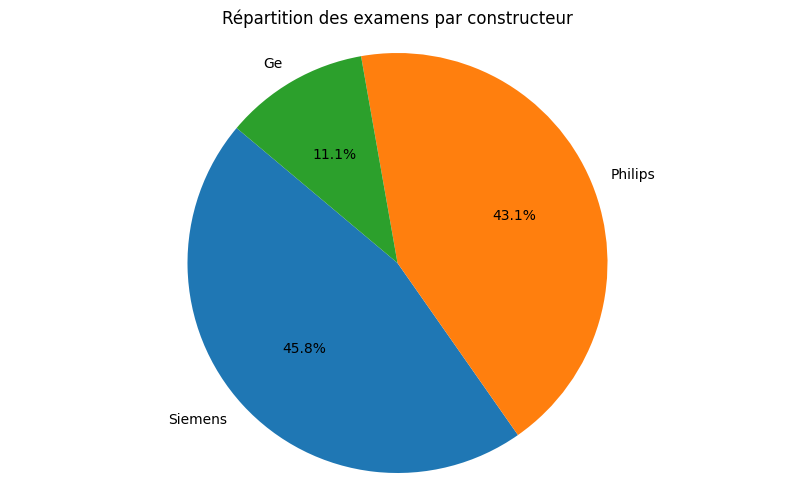

([<matplotlib.patches.Wedge at 0x7f4c484c3390>,
 [Text(-0.8110050472982525, -0.7431492536878171, 'Siemens (33)'),
  Text(1.0162674638666644, 0.4209518284626139, 'Philips (31)'),
  Text(-0.5500000421181905, 0.9526279198459328, 'Ge (8)')],
 [Text(-0.4423663894354104, -0.4053541383751729, '45.8%'),
  Text(0.5543277075636351, 0.2296100882523348, '43.1%'),
  Text(-0.30000002297355843, 0.5196152290068723, '11.1%')])

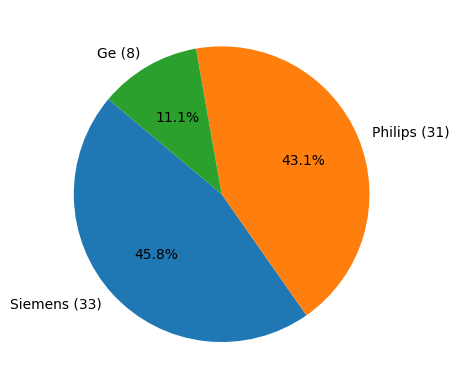

In [20]:
# Compter le nombre d'examens par constructeur
exam_count_by_constructeur = df_mri_data_M00['constructeur'].value_counts().reset_index()
exam_count_by_constructeur.columns = ['constructeur', 'Nombre d\'examens']

# Créer le diagramme circulaire
plt.figure(figsize=(10, 6))
plt.pie(exam_count_by_constructeur['Nombre d\'examens'], labels=exam_count_by_constructeur['constructeur'], autopct='%1.1f%%', startangle=140)
plt.title('Répartition des examens par constructeur')
plt.axis('equal')  # Assure que le diagramme est circulaire

plt.show()
# Ajouter une légende avec le nombre d'examens
labels = [f'{constructeur} ({count})' for constructeur, count in zip(exam_count_by_constructeur['constructeur'], exam_count_by_constructeur['Nombre d\'examens'])]
plt.pie(exam_count_by_constructeur['Nombre d\'examens'], labels=labels, autopct='%1.1f%%', startangle=140)

In [32]:
import glob
import os

# Chemin de base
base_path = os.path.join(DERIVATIVE_DIR1, "Volbrain_AssemblyNet1.0.0", "sub-*", "ses-M*","*")

# Différentes possibilités de suffixes
suffixes = ["uBCyGC", "nBCyGC", "yBCyGC", "uBCnGC", "nBCnGC", "yBCnGC", "uBCuGC", "nBCuGC", "yBCuGC"]

# Dictionnaire pour stocker les fichiers par suffixe
files_by_suffix = {suffix: [] for suffix in suffixes}

# Parcourir les fichiers et les stocker dans le dictionnaire
for suffix in suffixes:
    pattern = os.path.join(base_path, f"report_sub-*_ses-*_acq-*{suffix}*_T1w.csv")
    files_by_suffix[suffix] = glob.glob(pattern)

# Afficher les fichiers récupérés pour chaque suffixe
for suffix, files in files_by_suffix.items():
    print(f"Fichiers pour {suffix}:")
    for file in files:
        print(file)

Fichiers pour uBCyGC:
Fichiers pour nBCyGC:
Fichiers pour yBCyGC:
Fichiers pour uBCnGC:
Fichiers pour nBCnGC:
Fichiers pour yBCnGC:
Fichiers pour uBCuGC:
Fichiers pour nBCuGC:
Fichiers pour yBCuGC:


In [33]:
pattern

'/NAS/dumbo/protocoles/creamhd/data/20241223-153940_3DT1/derivatives_v0.2/Volbrain_AssemblyNet1.0.0/sub-*/ses-M*/*/report_sub-*_ses-*_acq-*yBCuGC*_T1w.csv'